# Week12_1  Scipy: Interpolation and Integration

In this lecture, we will look at two other common sub-packages of Scipy: [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html) and [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html).

## Interpolation
good for analyzing models with data

The simplest interpolation routine in [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html) is [interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d):

In [9]:
from scipy.interpolate import interp1d ## 1D interpolation, linear. Make
## straight line b/t two nearest points to make guesses

If we create a fake dataset:

In [3]:
import numpy as np
x = np.array([0., 1., 3., 4.])
y = np.array([0., 4., 3., 2.])

we can interpolate linearly by first creating an interpolating function:

In [5]:
f = interp1d(x, y) ## for x, gives value of what y should be

and we can then interpolate to any value of x within the original bounds:

In [6]:
f(0.5)

array(2.)

In [7]:
f(3.3)

array(2.7)

It is also possible to interpolate to several values at the same time:

In [10]:
f(np.array([0.5, 1.5, 2.5, 3.5]))

array([2.  , 3.75, 3.25, 2.5 ])

If the interpolating function is called outside the original range, an error is raised:

In [11]:
f(-1.)

ValueError: A value in x_new is below the interpolation range.

You can change this behavior by telling ``interp1d`` to not give an error in this case, but to use a set value:

In [17]:
f = interp1d(x, y, bounds_error=False, fill_value=-10.) ## extrapolate data and follow trend 
## beyond its bounds to fill_values value. More like forcing it to a point

In [18]:
f(-1.0)

array(-10.)

In [19]:
f(np.array([-1., 1., 3., 6.]))

array([-10.,   4.,   3., -10.])

By default, ``interp1d`` uses linear interpolation, but it is also possible to use e.g. cubic interpolation: 

In [21]:
f = interp1d(x, y, kind='cubic') ## makes it a smoother function rather than just a line
f(0.5)

array(2.58333333)

For more information, see the documentation for [interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d). There are also other interpolation functions available (for example for spline interpolation), which you can read up about at [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html).

## 2D+ Interpolation

[interp2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d) a linear interpolation in 2D.

[LinearNDInterpolator](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LinearNDInterpolator.html#scipy.interpolate.LinearNDInterpolator) which is a piecewise linear interpolant in N dimensions.

[NearestNDInterpolator](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.NearestNDInterpolator.html#scipy.interpolate.NearestNDInterpolator), which selects the Nearest-neighbor interpolation in N dimensions. Nearest grid point, compute distance in
all N dimensions and get you to nearest point.


## Integration

The available integration functions are listed at [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate). You will notice there are two kinds of functions - those that integrate actual Python functions, and those that integrate numerical functions defined by Numpy arrays.

First, we can take a look at one of the functions that can integrate actual Python functions. If we define a function:

In [22]:
def simple_function(x):
    return 3. * x**2 + 2. * x + 1.

we can integrate it between limits using:

In [24]:
from scipy.integrate import quad
print(quad(simple_function, 1., 2.))
## returns integral as well as the uncertainty

(10.999999999999998, 1.221245327087672e-13)


As described in the documentation for [quad](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad), the first value returned is the integral, and the second is the error on the integral. If we had solved the integral analytically, we would expect 11, so the result is correct.

We can also define functions as Numpy arrays:

In [26]:
x = np.linspace(1., 2., 1000) ## x b/t 1 and 2 with 1000 points
y = 3. * x**2 + 2. * x + 1.

And in this case we can use for example the [simps](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) function to integrate using Simpson's rule:

In [27]:
from scipy.integrate import simps
print(simps(y, x=x))

11.000000000501505


This can be very useful in cases where one wants to integral actual data that cannot be represented as a simple function or when the function is only available numerically.

Note that there is an issue on the [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) page - there should also be a menton of the ``trapz`` function which works similarly to ``simps`` but does trapezium integration:

In [28]:
from scipy.integrate import trapz
print(trapz(y, x=x))

11.000000501001502


## Exercise

Write a function that takes ``x``, and the parameters for a Gaussian (amplitude, displacement, width) and returns the value of the Gaussian at ``x``:

In [57]:
def gaussian(x):
    amplitude, displacement, width = 1,1,1
    return amplitude * np.exp(((-1) * (x - displacement)**2)/ 2*(width**2))

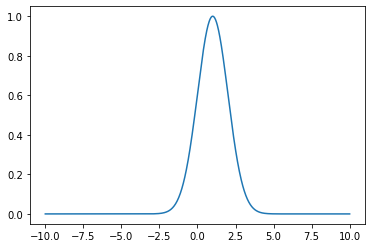

In [58]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
xlin = np.linspace(-10,10,1000)
ax.plot(xlin, gaussian(xlin))

Use ``quad`` to compute the integral and compare to what you would expect.

In [52]:
print(quad(gaussian, -4., 5.))

(2.506548168071794, 1.4775628603138375e-10)


Now create two arrays ``x`` and ``y`` that contain the Gaussian for fixed values ``x``, and try and compute the integral using ``simps``.

In [53]:
from scipy.integrate import simps

x = np.linspace(-4., 5., 1000)
y = gaussian(x)

print(simps(y, x=x))

2.5065481682296316


Compare this to what you found with ``quad`` and analytically.

Comparing the two, we returned the same answer for both to a degree of 10 decimal places. However, with the error given for quad's output, we are within the error to get about the same answer for both. 

Analytically, we expect the answer to be about 2.5065481680, so for this case the closest answer was actually quad. 